In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


In [4]:
from pmlb import fetch_data

X, y = fetch_data('1199_BNG_echoMonths', return_X_y=True)

In [5]:
X.shape

(17496, 9)

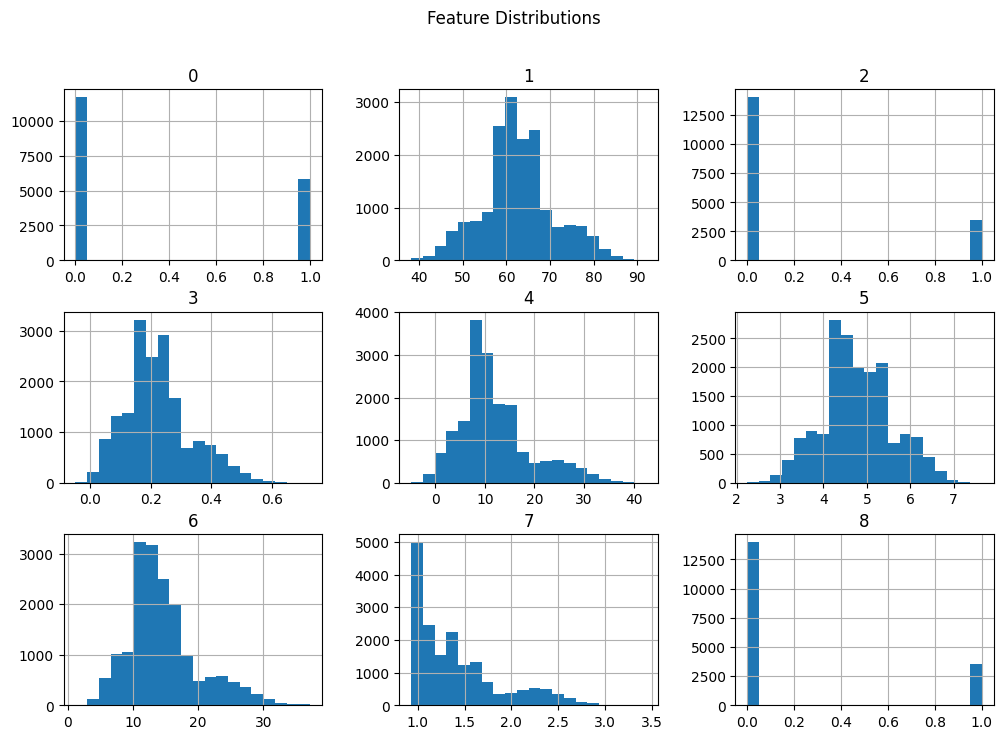

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_df = pd.DataFrame(X)
X_df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

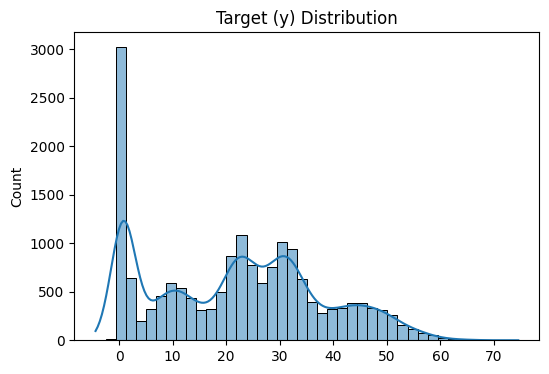

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

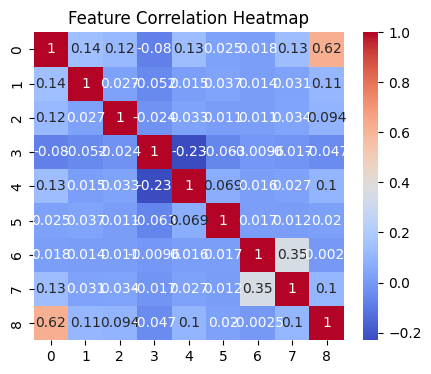

In [8]:
plt.figure(figsize=(5, 4))
corr = X_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=8, n_chains=4, ndpost=1000, nskip=1000, n_trees=100, n_jobs=8)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  1.042365                 1.139622             1.299775   
1                  1.038968                 1.029833             1.453204   
2                  1.031090                 1.013152             1.213815   
3                  1.011774                 1.022274             1.291692   
4                  1.045426                 1.048188             1.233391   
5                  1.043917                 1.050080             1.214265   
6                  1.008018                 1.078647             1.580219   
7                  1.062460                 1.050837             1.510475   
mean               1.035502                 1.054079             1.349604   
std                0.018099                 0.040101             0.144367   

      DefaultBART_Rhat_RMSE  
0                  1.842323  
1                  1.606952  
2                  1.392450

In [10]:
rhat_df.to_csv("results/real6_echoMonths_rhat.csv", index=False)

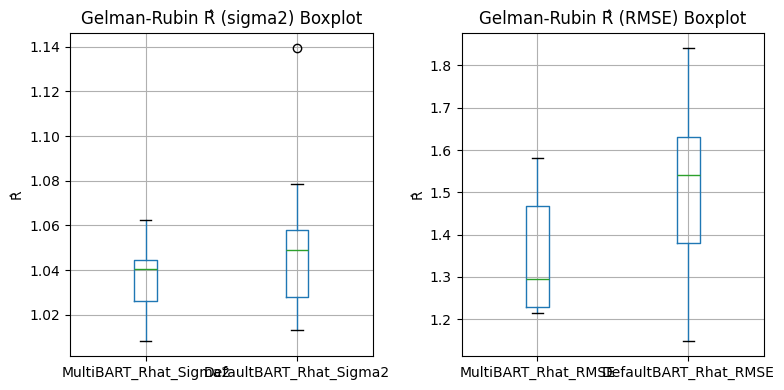

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

INFO:2025-11-25 06:10:04,302:jax._src.xla_bridge:812: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-11-25 06:10:04,468:jax._src.xla_bridge:812: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-11-25 06:10:07,868:jax._src.xla_bridge:812: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to op

test_mse:
       bart_mtmh        bart         btz          rf         xgb
0     128.450499  129.618600  128.896578  132.644593  139.323217
1     131.145815  133.624760  132.698433  135.221860  142.761038
2     128.387998  130.691259  129.785136  134.094306  139.665325
3     129.243878  130.594298  130.865318  136.009708  142.592322
4     129.330645  132.023783  131.199032  134.661939  142.401405
5     132.137125  132.683549  133.905448  137.830949  144.409112
6     127.344486  128.677275  129.154665  130.075645  143.240277
7     133.330303  134.802252  135.338516  137.396965  146.489538
mean  129.921343  131.589472  131.480391  134.741996  142.610279
std     2.069942    2.070624    2.319671    2.536243    2.336834



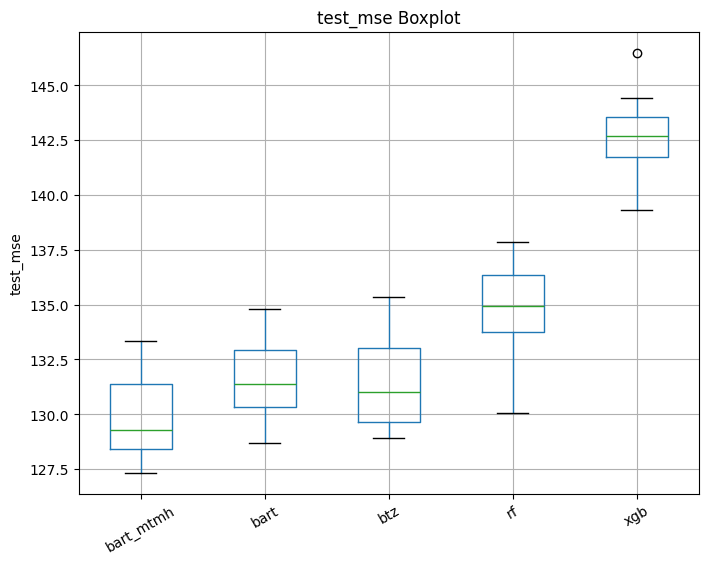

train_mse:
       bart_mtmh        bart         btz         rf        xgb
0     121.687574  124.941032  125.820258  18.837764  60.015500
1     122.448564  124.143404  126.047817  18.643544  56.621137
2     123.835697  125.602335  125.360346  18.682658  60.429968
3     121.787103  123.698360  125.596901  18.630229  59.054943
4     122.776486  124.926925  126.377872  18.653725  59.621118
5     120.937430  124.673179  124.980262  18.613275  59.194286
6     123.294959  125.190188  126.255682  18.792801  60.125988
7     121.568011  123.531093  124.796219  18.492577  59.351145
mean  122.291978  124.588314  125.654420  18.668322  59.301761
std     0.973025    0.731382    0.579155   0.107309   1.184680



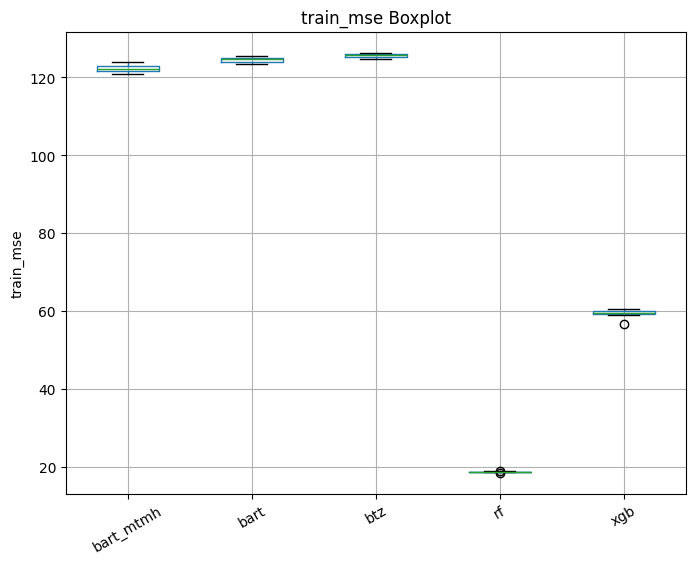

pi_length:
      bart_mtmh       bart        btz
0     43.865589  44.305106  44.784794
1     43.917584  44.118831  44.811314
2     44.336497  44.488256  44.648804
3     43.871438  44.070428  44.801140
4     44.071048  44.349184  44.696045
5     43.828002  44.317736  44.667004
6     44.095337  44.358316  44.787014
7     43.928404  44.149409  44.615742
mean  43.989237  44.269658  44.726482
std    0.170099   0.142648   0.078007



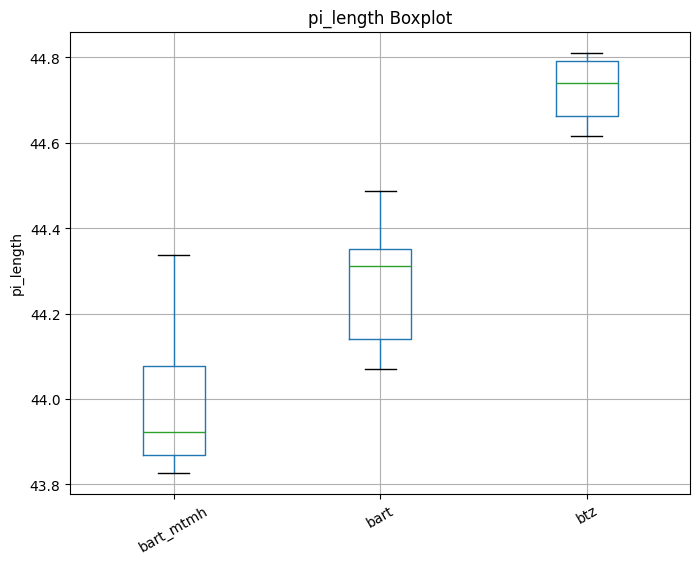

coverage:
      bart_mtmh      bart       btz
0      0.936443  0.939643  0.940786
1      0.936443  0.935071  0.939186
2      0.939872  0.938957  0.939643
3      0.939186  0.939643  0.943073
4      0.938500  0.940786  0.943759
5      0.936671  0.940558  0.941244
6      0.945359  0.944444  0.945816
7      0.937128  0.938500  0.942387
mean   0.938700  0.939701  0.941987
std    0.002994  0.002615  0.002219



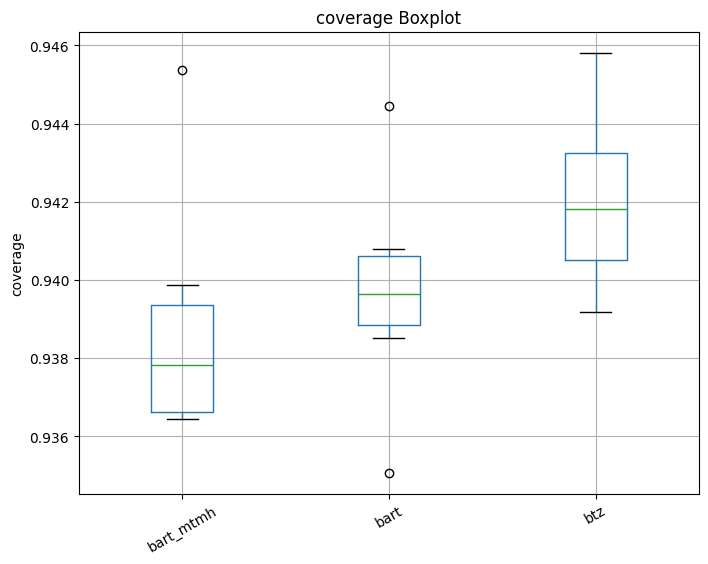

train_time:
       bart_mtmh       bart         btz         rf       xgb
0     612.426426  95.337271  138.428226  12.739681  0.330637
1     600.715614  85.871940  145.387027  15.328173  0.298748
2     607.643153  85.362603  145.972329  13.537861  0.328341
3     605.967341  84.190796  145.297896  14.458623  0.325239
4     603.099889  88.268225  146.542562  13.433244  0.285980
5     598.852349  87.903808  143.372630  16.325423  0.294867
6     608.500403  83.799204  145.612123  13.598161  0.288390
7     611.171331  91.966774  141.371880  12.971569  0.314948
mean  606.047063  87.837578  143.998084  14.049092  0.308394
std     4.846224   4.019279    2.800695   1.236644  0.018508



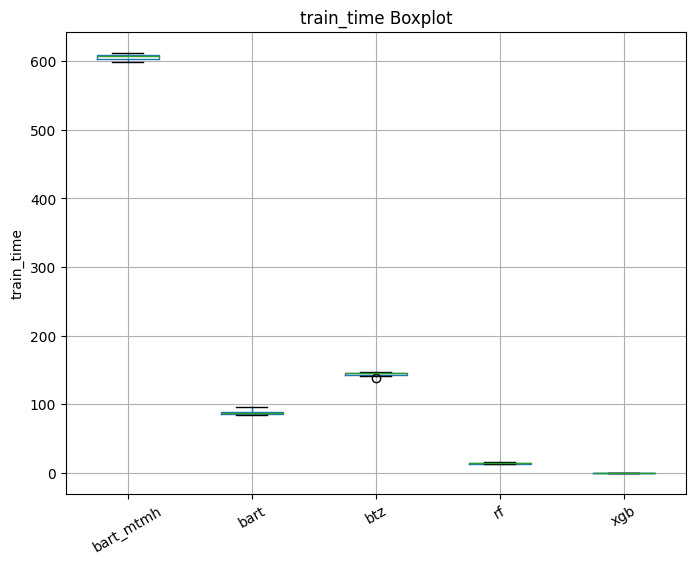

In [12]:
import matplotlib.pyplot as plt
import comparison
import pandas as pd

mse_results = comparison.bart_mse_comparison(X, y, n_runs=8, n_skip=1000, n_post=1000, n_trees=100, n_jobs=8)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [13]:
for k, v in mse_results.items():
    csv_name = f"results/real6_echoMonths_{k}.csv"
    v.to_csv(csv_name, index=False)

## Multi-tries

In [14]:
from multi_tries import multi_tries_performance
import pandas as pd

csv_path = "results/real6_echoMonths_tries.csv"
existing_df = None

if os.path.exists(csv_path):
    existing_df = pd.read_csv(csv_path)

df = multi_tries_performance(
    X, y,
    multi_tries_list=[1,5,10,20,50],
    n_runs=8, n_chains=4,
    ndpost=1000, nskip=1000, n_trees=100, n_jobs=8
)

if existing_df is not None:
    df = pd.concat([existing_df, df], ignore_index=True)
    df = df.sort_values(by='multi_tries', ascending=True).reset_index(drop=True)

df.to_csv("results/real6_echoMonths_tries.csv", index=False)

In [15]:
print(df)

   multi_tries  Rhat_Sigma2  Rhat_RMSE    Test_MSE  Coverage   Train_Time
0            1     1.041658   1.499245  131.589076  0.937814   132.101030
1            5     1.036044   1.307914  130.584237  0.938100   352.217788
2           10     1.035502   1.349604  130.692271  0.936814   598.406943
3           20     1.035654   1.180965  130.258778  0.937071  1071.510746
4           50     1.025464   1.190615  129.851406  0.937729  2448.696185
